# Pyber Ride Sharing

Trend 1 Urban cities has more drivers compare to suburban and rural

Trend 2 Average fare are less expensive in urban cities

Trend 3 More people use Pyber Ride Sharing service in urban cities

# Part I Bubble Chart

In [91]:
# Import Pandas module
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# load CSV
city = "city_data.csv"
ride = "ride_data.csv"

In [92]:
# Read with pandas--low_memory required to suppress errors about mixed data types
city_pd = pd.read_csv(city, encoding='iso-8859-1', low_memory=False)

In [93]:
# Read with pandas--low_memory required to suppress errors about mixed data types/student csv
ride_pd= pd.read_csv(ride, encoding='iso-8859-1', low_memory=False)

In [94]:
# Performing an inner merge on the two dataframes, using the "city" field
data_merge_df = pd.merge(city_pd, ride_pd, on="city")
data_merge_df.head()

,city,driver_count,type,date,fare,ride_id
0,Kelseyland,63,Urban,2016-08-19 04:27:52,5.51,6246006544795
1,Kelseyland,63,Urban,2016-04-17 06:59:50,5.54,7466473222333
2,Kelseyland,63,Urban,2016-05-04 15:06:07,30.54,2140501382736
3,Kelseyland,63,Urban,2016-01-25 20:44:56,12.08,1896987891309
4,Kelseyland,63,Urban,2016-08-09 18:19:47,17.91,8784212854829


In [95]:
# remove duplicates
citydata_df=data_merge_df.drop_duplicates(['city'], keep='last')

In [96]:
# reset index
cityride_df=citydata_df.reset_index(drop=True)

In [97]:
# Average Fare ($) Per City
city_data= data_merge_df.groupby("city")
avg_fare = pd.DataFrame(city_data["fare"].mean())
avg1=avg_fare.reset_index()

In [98]:
# Total Number of Rides Per City
city_data= data_merge_df.groupby("city")
num_ride = pd.DataFrame(city_data["ride_id"].count())
numride1=num_ride.reset_index()

In [99]:
# Total Number of Drivers Per City
driver_count=cityride_df.iloc[:,0:3]

In [100]:
#merge table
total1_merge_df = pd.merge(avg1, numride1, on="city")

In [101]:
#merge table
total2_merge_df = pd.merge(total1_merge_df, driver_count, on="city")

In [102]:
#rename
final_df = total2_merge_df.rename(columns={"city":"City",
                                       "fare":"Avg Fare",
                                       "ride_id":"Num of Rides",
                                       "driver_count":"Num of Drivers",
                                       "type":"City Type"})
final_df.head()

,City,Avg Fare,Num of Rides,Num of Drivers,City Type
0,Alvarezhaven,23.928710,31,21,Urban
1,Alyssaberg,20.609615,26,67,Urban
2,Anitamouth,37.315556,9,16,Suburban
3,Antoniomouth,23.625000,22,21,Urban
4,Aprilchester,21.981579,19,49,Urban


In [103]:
#show city type
City_Type = "Urban"
urban_df = final_df.loc[final_df["City Type"] == City_Type]
urban_df.sort_values(by='Num of Rides', ascending=0).head()

,City,Avg Fare,Num of Rides,Num of Drivers,City Type
73,Port Johnstad,25.882941,34,22,Urban
100,Swansonbury,27.464706,34,64,Urban
94,South Louis,27.087500,32,12,Urban
28,Jacobfort,24.779355,31,52,Urban
0,Alvarezhaven,23.928710,31,21,Urban


In [104]:
#show city type
City_Type = "Suburban"
sub_df = final_df.loc[final_df["City Type"] == City_Type]
sub_df.sort_values(by='Num of Rides', ascending=0).head()

,City,Avg Fare,Num of Rides,Num of Drivers,City Type
72,Port James,31.806562,64,3,Suburban
101,Thomastown,30.308333,24,1,Suburban
62,New Samanthaside,34.069130,23,16,Suburban
77,Port Michelleview,26.720000,22,16,Suburban
81,Rodriguezview,31.866500,20,10,Suburban


In [105]:
#show city type
City_Type = "Rural"
rural_df = final_df.loc[final_df["City Type"] == City_Type]
rural_df.sort_values(by='Num of Rides', ascending=0).head()

,City,Avg Fare,Num of Rides,Num of Drivers,City Type
92,South Joseph,38.983333,12,3,Rural
17,East Leslie,33.660909,11,9,Rural
34,Kennethburgh,36.928000,10,3,Rural
66,North Whitney,38.146000,10,10,Rural
18,East Stephen,39.053000,10,6,Rural


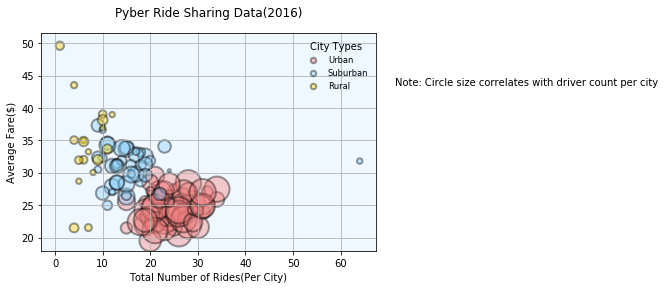

In [106]:
# create data
x1 = urban_df["Num of Rides"]
y1 = urban_df["Avg Fare"]
z1 = urban_df["Num of Drivers"]
x2 = sub_df["Num of Rides"]
y2 = sub_df["Avg Fare"]
z2 = sub_df["Num of Drivers"]
x3 = rural_df["Num of Rides"]
y3 = rural_df["Avg Fare"]
z3 = rural_df["Num of Drivers"]


# use the scatter function
plt.scatter(x1, y1, s=z1*10, color="lightcoral", edgecolors="black", marker="o", linewidth= 2, alpha=0.4, label='Urban')
plt.scatter(x2, y2, s=z2*10, color="lightskyblue", edgecolors="black", marker="o", linewidth= 2, alpha=0.4,label='Suburban')
plt.scatter(x3, y3, s=z3*10, color="gold", edgecolors="black", marker="o", linewidth= 2, alpha=0.4,label='Rural')
plt.xlabel('Total Number of Rides(Per City)')
plt.ylabel('Average Fare($)')
plt.title('Pyber Ride Sharing Data(2016)',y=1.05)
plt.rcParams['axes.facecolor'] = 'aliceblue'
plt.grid(True)
lgnd=plt.legend(loc="best", frameon=False, title="City Types", fontsize='small')
lgnd.legendHandles[0]._sizes = [30]
lgnd.legendHandles[1]._sizes = [30]
lgnd.legendHandles[2]._sizes = [30]
plt.figtext(1.25, 0.7,"Note: Circle size correlates with driver count per city", wrap=True,
            horizontalalignment='center', fontsize=10)
plt.show()

# Part II Pie Chart

In [107]:
# % of Total Fares by City Type
city_fare=data_merge_df.groupby("type")
city_f = pd.DataFrame(city_fare["fare"].sum())
city_f

,fare
type,
Rural,4255.09
Suburban,20335.69
Urban,40078.34


In [108]:
#total fare
total_fare = city_f["fare"].sum()
total_fare

64669.119999999966

In [109]:
# calculate % of total fare by city type
city_f["% of Total Fares by City Type"] = city_f["fare"]/total_fare * 100
city_f

,fare,% of Total Fares by City Type
type,,
Rural,4255.09,6.579786
Suburban,20335.69,31.445750
Urban,40078.34,61.974463


# Total Fares by City Type

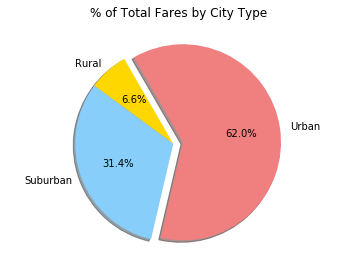

In [110]:
# Pie Chart
city_type = ["Rural", "Suburban", "Urban"]
city_fare = city_f["fare"]
colors = ["gold", "lightskyblue","lightcoral"]
explode = [0.0,0.0,0.1]
plt.pie(city_fare, explode=explode, labels=city_type, colors=colors,
        autopct="%1.1f%%", shadow=True, startangle=120)
plt.title('% of Total Fares by City Type',y=1.05)
plt.axis("equal")
plt.show()

In [111]:
# % of Total Rides by City Type
city_rides=data_merge_df.groupby("type")
city_r = pd.DataFrame(city_rides["ride_id"].count())

In [112]:
#total ride
total_ride = data_merge_df["ride_id"].count()

In [113]:
# calculate % of total ride by city type
city_r["% of Total Rides by City Type"] = city_r["ride_id"]/total_ride * 100
city_r

,ride_id,% of Total Rides by City Type
type,,
Rural,125,5.193187
Suburban,657,27.295388
Urban,1625,67.511425


# Total Rides by City Type

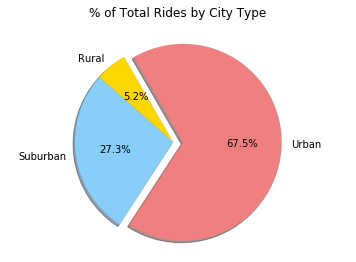

In [114]:
# Pie Chart
city_type = ["Rural", "Suburban", "Urban"]
city_ride = city_r["ride_id"]
colors = ["gold", "lightskyblue","lightcoral"]
explode = [0.0,0.0,0.1]
plt.pie(city_ride, explode=explode, labels=city_type, colors=colors,
        autopct="%1.1f%%", shadow=True, startangle=120)
plt.title('% of Total Rides by City Type',y=1.05)
plt.axis("equal")
plt.show()

In [115]:
# % of Total Drivers by City Type
city_driver=driver_count.groupby("type")
city_dc = pd.DataFrame(city_driver["driver_count"].sum())

In [116]:
#total driver
total_dc = driver_count["driver_count"].sum()

In [117]:
# calculate % of total driver by city type
city_dc["% of Total Drivers by City Type"] = city_dc["driver_count"]/total_dc * 100
city_dc

,driver_count,% of Total Drivers by City Type
type,,
Rural,104,3.119376
Suburban,623,18.686263
Urban,2607,78.194361


# Total Drivers by City Type

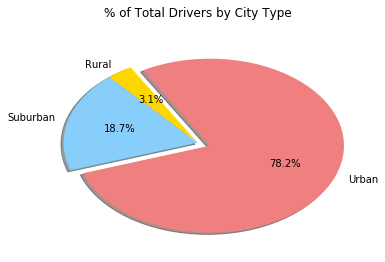

In [118]:
# Pie Chart
city_type = ["Rural", "Suburban", "Urban"]
city_driver = city_dc["driver_count"]
colors = ["gold", "lightskyblue","lightcoral"]
explode = [0.0,0.0,0.1]
plt.pie(city_driver, explode=explode, labels=city_type, colors=colors,
        autopct="%1.1f%%", shadow=True, startangle=120)
plt.title('% of Total Drivers by City Type',y=1.05)

plt.show()